# PaGMO: Parallel Global Multiobjective Optimizer
*Marcus Märtens, Krzysztof Nowak, Dario Izzo*

!["PaGMO logo"](http://esa.github.io/pygmo/_images/logo.png "PaGMO logo")

# What is it?
* **PaGMO**: Optimization library written in C++
* **PyGMO**: Python interface for easy use and rapid prototyping
* Cross-plattform: Available for OSX, Windows and Linux

Developed by the *PaGMO Foundation* in collaboration with the *European Space Agency (ESA)*

http://esa.github.io/pygmo/index.html

The slides of this presentation are online as well:

http://esa.github.io/pygmo/presentations/slides.html

# Main features

* Rich collection of optimization **benchmark problems** and **bio-inspired evolutionary algorithms**
  * ZDT, DTLZ, CEC, De Jong, Griewank, Rosenbrock, Schwefel, Rastrigin, etc.
* Features for **single-objective, multi-objective** and **stochastic** optimization
* **Constraint-handling techniques**
  * Death-penalty, Self-adaptive penalty, Co-evolution, Repair methods, Immune system, etc.
* Fast **hypervolume** computations
* **Racing** techniques to improve efficiency
* Coarse grained parallelization model: **the island model** which allows for **asynchronous migration** operations

## Included problems

### Box-constrained Continuous Single-objective
* Ackley
* Bukin F6
* Branin
* CEC2013
* De Jong
* Griewank
* Himmelblau
* Lennard-Jones
* Michalewicz
* Rosenbrock
* Rastrigin
* Schwefel
* MGA-1DSM
* Cassini 1 & 2
* Rosetta
* Tandem
* Laplace
* ...

### Constrained Continuous Single-objective

* CEC2006
* Pressure vessel design
* Welded beam design
* Tension compression string design
* Luksan Vlcek 1,2 & 3
* Planet to Planet LT Transfer
* SNOPT Toy problem
* GTOC 2
* ...

### Constrained Continous Multi-objective

* CEC2009(CF1-CF10)

### Box-Constrained Continuous Multi-objective

* Kursawe's study
* Fonseca and Flemengs's study
* Poloni's study
* Shaffer's study
* ZDT
* DTLZ
* CEC2009 (UF1-UF10)
* MGA-1DSM
* Cassini 1
* ...

## Included algorithms

### Global Optimization

* Differential Evolution (DE) various variants
* Self-adaptive DE (jDE)
* Particle Swarm Optimization (PSO)
* Simple Genetic Algorithm (SGA)	
* Vector Evaluated Genetic Algorithm (VEGA)
* (N+1)-EA Evol. Algorithm (SEA)
* Non-dominated Sorting GA (NSGA-II)
* S-Metric Selection EMOA (SMS-EMOA)
* Corana’s Simulated Annealing (SA)
* Parallel Decomposition (PADE)
* Non-dominated Sorting PSO (NSPSO)
* Strength Pareto EA 2 (SPEA2)
* Artificial Bee Colony (ABC)
* Improved Harmony Search (IHS)
* Monte Carlo Search (MC)
* Covariance Matrix Adaptation-ES (CMA-ES)
* ...

### Local optimization

* Compass Search (CS)
* Nelder-mead (simplex, subplex)
* BFGS, BFGS2
* Sequentieal Least Squares
* Truncated Newton Method
* Conjugate Gradient
* COBYLA
* BOBYQA
* Method of Moving Asymptotes
* SNOPT (interface for 3rd party code)
* IPOPT (interface for 3rd party code)
* ...

# Basic Workflow

Include the library in your IPython session:

In [2]:
from PyGMO import *
import matplotlib.pylab as plt
%matplotlib inline

Write your optimization problem in C++ or Python (easy!)

We pick a predefined problem out of the library for demonstration

In [3]:
prob = problem.dtlz(3)
print(prob)

Problem name: DTLZ3
	Global dimension:			12
	Integer dimension:			0
	Fitness dimension:			3
	Constraints dimension:			0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0, 0, 0, 0,  ... ]
	Upper bounds: [1, 1, 1, 1, 1,  ... ]
	Constraints tolerance: []



Take a solver out of the library, for example NSGA-II

In [4]:
alg = algorithm.nsga_II(gen=10)
print(alg)

Algorithm name: Nondominated Sorting Genetic Algorithm II (NSGA-II) - gen:10 cr:0.95 eta_c:10 m:0.01 eta_m:10



Put both of them on an island with a population of 100...

In [5]:
isl = island(alg, prob, 100)

... and start the evolution!

In [6]:
isl.evolve(100)

After the optimizer finished its 100 evolution steps, we can visualize how far the population has converged to the Pareto-front:

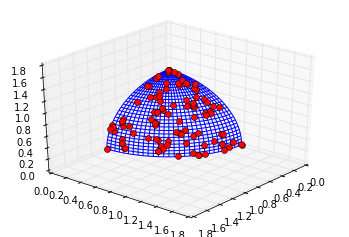

In [7]:
prob.plot(isl.population)
plt.show()

We can further analyze the solution by computing quality metrics like fitness evaluations or average distance to the Pareto-Front:

In [8]:
print("Fitness evaluations:", isl.problem.fevals)
print("Distance to Pareto-front:", prob.p_distance(isl.population))

Fitness evaluations: 99377
Distance to Pareto-front: 0.0004189772748457443


Given a reference point at (2.0, 2.0, 2.0) we can compute the hypervolume of this solution:

In [9]:
ref = (2.0, 2.0, 2.0)
hv = util.hypervolume(isl.population)
print("Hypervolume indicator:", hv.compute(ref))

Hypervolume indicator: 7.3681399274930275


# Custom problems in Python

Require only a couple of lines:

In [10]:
from PyGMO.problem import base
class my_mo_problem(base):
    """
    A multi-objective problem.
    (This is actually a Python implementation of 2-dimensional ZDT-1 problem)
    """

    def __init__(self, dim=2):
        # Base constructor as 'dim' dimensional problem, with 0 integer parts and 2 objectives.
        super(my_mo_problem,self).__init__(dim, 0, 2)
        self.set_bounds(0.0, 1.0)

    # Reimplement the virtual method that defines the objective function
    def _objfun_impl(self, x):
        f0 = x[0]
        g = 1.0 + 4.5 * x[1]
        f1 = g * (1.0 - sqrt(f0 / g))
        return (f0, f1)

    # Add some output to __repr__
    def human_readable_extra(self):
        return "\n\tMulti-Objective problem"

# Decomposition

* Any **multi-objective** problem can be decomposed by PaGMO into several **single-objective** problems
* The final solution is the **union** of all single-objective solutions
* Each single-objective problem is solved in **parallel** by using multi-processing


* We can use the algorithm **PaDe** to do exactly that:

Mambrini, Andrea, and Dario Izzo. *"PaDe: a parallel algorithm based on the MOEA/D framework and the island model."* Parallel Problem Solving from Nature–PPSN XIII. Springer International Publishing, 2014. 711-720.

The diversity of the solution by NSGA-II was not very good. Let us improve on this aspect by the use of decomposition!

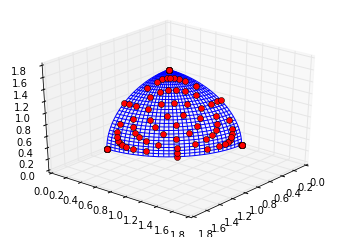

In [11]:
prob = problem.dtlz(3)
alg = algorithm.pade(gen = 10, decomposition = 'tchebycheff', weights='grid')
pop = population(prob,105)
pop = alg.evolve(pop)
_ = prob.plot(pop)

In [12]:
print("Fitness evaluations:", pop.problem.fevals)
print("Distance to Pareto-front:", prob.p_distance(pop))

Fitness evaluations: 210
Distance to Pareto-front: 3.751665644813329e-11


# Parallelism in PaGMO

* Coarse grained optimization: **Island Model**
    * Each island encapsulates a **population** which is used by evolutionary solvers
    * An island is managed by one unit of computation, i.e. a node in a cluster, a process or a thread


* Islands are connected in a topology that allows for sporadic exchange of solutions, called **migration**
    * Migration can be beneficial for solving optimization problems
    * Populations stuck in local optima may move out again by receiving migrants


* Parallelism is transparent to the user and absurdly easy to use
    

**Note:** Each algorithm and problem is well-documented in PaGMO. You review the definition of a problem or the parameters of an algorithm by the ?-operator in an IPython-shell:

In [13]:
algorithm.de?

```
Constructs a Differential Evolution algorithm:
USAGE: algorithm.de(gen=1, f=0.5, cr=0.9, variant=2, ftol=1e-6, xtol=1e-6, 
                    screen_output = False)

* gen: number of generations
* f: weighting factor in [0,1] (if -1 self-adptation is used)
* cr: crossover in [0,1] (if -1 self-adptation is used)
* variant: algoritmic variant to use (one of [1 .. 10])
        1. DE/best/1/exp
        2. DE/rand/1/exp
        3. DE/rand-to-best/1/exp
        4. DE/best/2/exp
        5. DE/rand/2/exp
        6. DE/best/1/bin
        7. DE/rand/1/bin
        8. DE/rand-to-best/1/bin
        9. DE/best/2/bin
        10. DE/rand/2/bin
* ftol stop criteria on f
* xtol stop criteria on x
```

Let us figure out, which variant of differential evolution (DE) works best by running them in parallel!

In [14]:
prob = problem.ackley()
pop = population(prob, 100)
archi = archipelago()
for i in range(4, 11):
    alg = algorithm.de(gen = 1, variant = i)
    archi.push_back(island(alg, pop))

!["alttext"](https://esa.github.io/pagmo/ackley.gif "Ackley Function")


The archipelago is a collection of islands. We can plot the archipelago by using the draw-command:

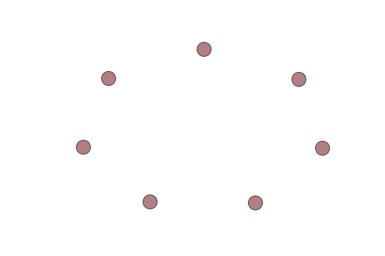

In [15]:
pos = archi.draw(n_size=200, n_color = 'fitness')

The color is scaled according to the fitness of the *best solution* of each island **relative** to all other islands. Brighter colors mean better fitness **relative** to other islands.

Let us evolve the archipelago now for 10 steps:

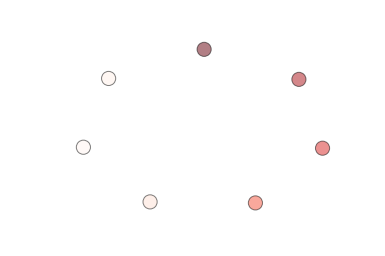

In [16]:
archi.evolve(10)
_ = archi.draw(layout = pos, n_size=200, n_color = 'fitness')

In [17]:
for i, isl in enumerate(archi):
    print("Island({0}): {1:0.5f}".format(i, isl.population.champion.f[0]))  

Island(0): 11.97926
Island(1): 14.28453
Island(2): 11.86857
Island(3): 14.79514
Island(4): 12.28186
Island(5): 13.80271
Island(6): 15.28630


For another 100 steps:

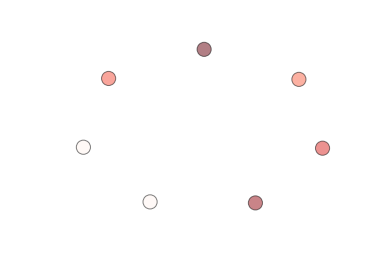

In [18]:
archi.evolve(100)
_ = archi.draw(layout = pos, n_size=200, n_color = 'fitness')

In [19]:
for i, isl in enumerate(archi):
    print("Island({0}): {1:0.5f}".format(i, isl.population.champion.f[0]))

Island(0): 5.58691
Island(1): 6.73092
Island(2): 0.18177
Island(3): 5.01175
Island(4): 0.14178
Island(5): 8.73333
Island(6): 9.59547


And for another 1000 steps:

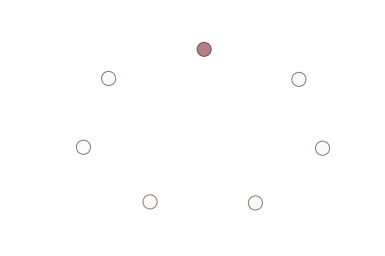

In [20]:
archi.evolve(1000)
_ = archi.draw(layout = pos, n_size=200, n_color = 'fitness')

In [21]:
for i, isl in enumerate(archi):
    print("Island({0}): {1:0.5f}".format(i, isl.population.champion.f[0]))

Island(0): 0.00000
Island(1): 0.00017
Island(2): 0.00000
Island(3): 0.00001
Island(4): 0.00000
Island(5): 0.02084
Island(6): 1.79628


## Migration in the island model

* **Selection policy:** Which solutions shall be sent to other islands?
* **Replacement policy:** Which solutions shall be replaced by immigrants from other islands? 
* **Migration topology:** How are islands connected?
* **Migration interval:** How often does migration occur?

In [22]:
prob = problem.ackley()
pop = population(prob, 100)

# substitute best 10 individuals if better than the 10 worst
s_pol = migration.best_s_policy(10)
r_pol = migration.fair_r_policy(10)

archi = archipelago(topology = topology.fully_connected())
for i in range(4, 11):
    alg = algorithm.de(gen = 1, variant = i)
    archi.push_back(island(alg, pop, s_policy=s_pol, r_policy=r_pol))

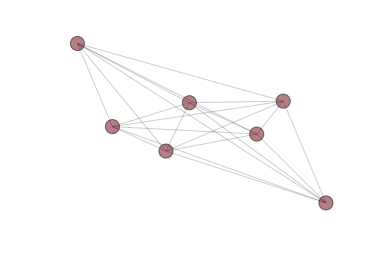

In [23]:
pos = archi.draw(n_size=200, n_color = 'fitness')

Now evolve this archipelago for 10 steps!

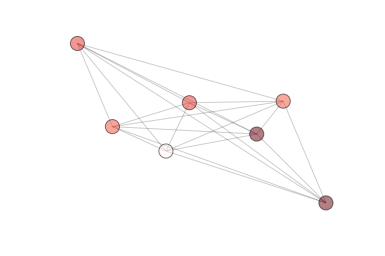

In [24]:
archi.evolve(10)
_ = archi.draw(layout = pos, n_size=200, n_color = 'fitness')

In [25]:
for i, isl in enumerate(archi):
    print("Island({0}): {1:0.5f}".format(i, isl.population.champion.f[0]))

Island(0): 11.08606
Island(1): 13.03158
Island(2): 11.14484
Island(3): 11.50024
Island(4): 8.59672
Island(5): 11.52943
Island(6): 13.03158


And for another 100 steps!

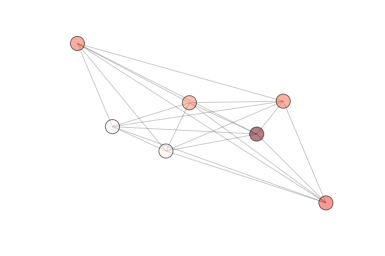

In [26]:
archi.evolve(100)
_ = archi.draw(layout = pos, n_size=200, n_color = 'fitness')

The **relative coloring** is misleading here. In fact, thanks to migration, all islands have already converged very close to the optimum. Even the island with the suboptimal variant of DE is close to optimal, which can be checked by comparing the actual fitness for each island:

In [27]:
for i, isl in enumerate(archi):
    print("Island({0}): {1:0.5f}".format(i, isl.population.champion.f[0]))

Island(0): 0.00040
Island(1): 0.00070
Island(2): 0.00008
Island(3): 0.00034
Island(4): 0.00010
Island(5): 0.00041
Island(6): 0.00047


## Monitoring the information flow in a large archipelago

!["alttext"](http://esa.github.io/pygmo/_images/movie.gif "Information flow")

Once an optimal solution is found, it spreads through the archipelago, taking over most of the islands.

## More remarks on migration

* Migration is implemented **asynchronously** in PaGMO
    * Island do not synchronize
    * Migrants are processed once they show up in the migrant buffer of an island


* Migration is possible for multi-objective problems as well
    * Selection and replacement policies work by **crowding distance** or **hypervolume**
    
    
* **Migration-mixing** (different solvers for one problem) might improve convergence speed or even solution quality


* Migration for **multistart**
    * Often, solvers are run for 100 times for statistics and due their *randomness*
    * This can be done with no overhead by a disconnected archipelago


# Hypervolume and Many-objective optimization

* PaGMO implements several state-of-the-art algorithms for computing:
    * Hypervolume indicator
    * Exclusive contributions of points
    * Least- and Greatest Contributors
    

* The fastest algorithm for the given task is selected **automatically**


* Emmerich, Michael TM, and Carlos M. Fonseca. *"Computing hypervolume contributions in low dimensions: Asymptotically optimal algorithm and complexity results."* Evolutionary Multi-Criterion Optimization. Springer Berlin Heidelberg, 2011.
* While, Lyndon, Lucas Bradstreet, and Luigi Barone. *"A fast way of calculating exact hypervolumes."* Evolutionary Computation, IEEE Transactions on 16.1 (2012): 86-95.
* Guerreiro, Andreia P., Carlos M. Fonseca, and Michael TM Emmerich. *"A Fast Dimension-Sweep Algorithm for the Hypervolume Indicator in Four Dimensions."* CCCG. 2012.
* Fonseca, Carlos M., Luís Paquete, and Manuel López-Ibánez. *"An improved dimension-sweep algorithm for the hypervolume indicator."* Evolutionary Computation, 2006. CEC 2006. IEEE Congress on. IEEE, 2006.
    

The hypervolume can be computed on a set of points...

In [28]:
points = [(3,4,5),(4,5,6),(6,7,8),(5,2,7)]
ref = (10,10,10)
hv = util.hypervolume(points)
print(hv.compute(ref))

240.0


... or by the fitness-vectors of any multi-objective population:

In [29]:
prob = problem.dtlz(3, fdim=5)
print(prob)

Problem name: DTLZ3
	Global dimension:			14
	Integer dimension:			0
	Fitness dimension:			5
	Constraints dimension:			0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0, 0, 0, 0,  ... ]
	Upper bounds: [1, 1, 1, 1, 1,  ... ]
	Constraints tolerance: []



In [30]:
pop = population(prob, 100)
hv = util.hypervolume(pop)
ref = hv.get_nadir_point(1)
print("Hypervolume indicator: ", hv.compute(ref))
for i in range(4):
    print("Exclusive contribution of point {0}: {1}".format(i, hv.exclusive(i, ref)))

Hypervolume indicator:  1934682834155372.2
Exclusive contribution of point 0: 0.0
Exclusive contribution of point 1: 0.0
Exclusive contribution of point 2: 0.0
Exclusive contribution of point 3: 2445785139707.25


The computational complexity of the hypervolume indicator scales exponentially with the number of dimensions:

!["Hypervolume indicator"](http://esa.github.io/pygmo/_images/hv_compute_runtime_plot.png)

For higher dimensions, the problem of computing the hypervolume becomes intractable. PaGMO implements the FPRAS von Bringmann and Friedrich for this case:

* Bringmann, Karl, and Tobias Friedrich. "Approximating the volume of unions and intersections of high-dimensional geometric objects." Algorithms and Computation. Springer Berlin Heidelberg, 2008. 436-447.

!["FPRAS"](http://esa.github.io/pygmo/_images/hv_fpras_extreme.png)

# PaGMO applied: spacecraft trajectory optimization

* The MGA-1DSM can be used to encode a trajectory with 
    * multiple gravity assists (MGA)
    * and 1 deep space maneouver (1DSM)
    

* We need to define:
    * The sequence of planets that we want to visit
    * The time window for the launch
    * The initial velocity provided by the launching system
    * Bounds on the transfer-time between the planets (legs)

In [31]:
from PyKEP import *

In [32]:
seq = [planet.jpl_lp('earth'), planet.jpl_lp('venus'), planet.jpl_lp('venus'), planet.jpl_lp('mercury')]
t_start = epoch_from_string('2020-01-01 0:0:0')
t_end = epoch_from_string('2024-12-31 23:59:59')
t0 = [t_start, t_end]
tof = [365.25, 365.25 * 5]

In [33]:
prob = problem.mga_1dsm_alpha(seq, t0, tof, multi_objective=False)

We want to find to find a couple of fuel-efficient solutions first in order to have seeds for the multi-objective optimization. For this purpose, we write a small function that runs an optimization and returns the best solution after convergence.

In [34]:
def single_opt(prob):
    """ Generating various single-objective solutions for seeding. """
    alg = algorithm.jde(gen = 1000)
    pop = population(prob, 40)
    fit = pop.champion.f[0] + 2000
    while fit - pop.champion.f[0] > 1:
        fit = pop.champion.f[0]
        pop = alg.evolve(pop)
    return pop.champion

In [35]:
# Note: This computation might take a couple of minutes
champs = []
for i in range(100):
    champs.append(single_opt(prob))

We instantiate a new problem now, which is multi-objective. The first objective is fuel-consumption (for deep space maneouvers) and the second objective is total time of flight until arrival on Mercury.

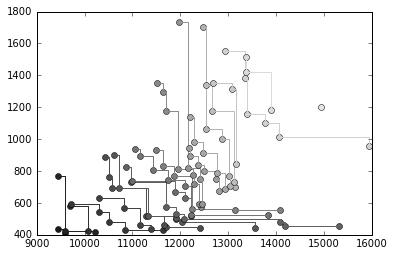

In [36]:
prob2 = problem.mga_1dsm_alpha(seq, t0, tof, multi_objective=True)
pop = population(prob2)
for c in champs:
    pop.push_back(c.x)
pop.plot_pareto_fronts()

A multi-objective solver (i.e. NSGA-II) can be used to advance this population towards the Pareto front of the problem.

In [37]:
alg = algorithm.nsga_II(gen= 10000)
isl = island(alg, pop)
isl.evolve(1)

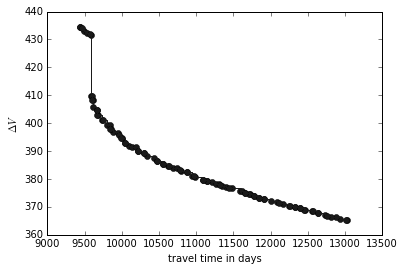

In [38]:
_ = isl.population.plot_pareto_fronts()
_ = plt.xlabel('travel time in days')
_ = plt.ylabel('$\Delta V$')

# A glimpse in the future

Current stable version of PaGMO is 1.1.7.

But PaGMO will soon evolve into PaGMO 2.0!

A redesign from scratch has been started with the following goals in mind:
* Header-only C++11 library for easy inclusion in C++ projects
* Enhanced parallelization: cross plattform (OSX, Windows, Linux)
* Enhanced clustering capabilities
* Enhanced extensibility (Type erasure, no more inheritance for custom problems)

# The End

Some Links for you:

* Documentation and Homepage: http://esa.github.io/pygmo/
* Codebase: https://github.com/esa/pagmo
* Releases: https://github.com/esa/pagmo/releases
* Chat with the developers: https://gitter.im/esa/pagmo


Contact us via eMail:

* Marcus Märtens (mmarcusx@gmail.com)
* Krzysztof Nowak (kn@linux.com)
* Dario Izzo (dario.izzo@gmail.com)